# Neural Network Assignments

### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
### The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



#### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



#### Attribute Information:

###### The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
gt = pd.read_csv("D:/NeuralNetwork/gas_turbines.csv")

In [3]:
gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## EDA

In [4]:
gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
gt.shape

(15039, 11)

In [7]:
gt.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [8]:
gt.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

## Handling Duplicate records

In [9]:
# check for duplicate data
duplicate = gt.duplicated()
print(duplicate.sum())
gt[duplicate]

0


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


## VISUALISATION

AT


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


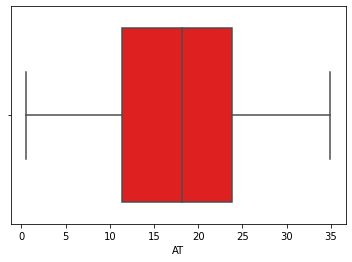

AP


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


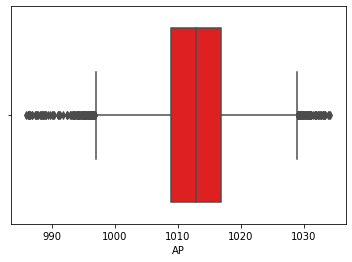

AH


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


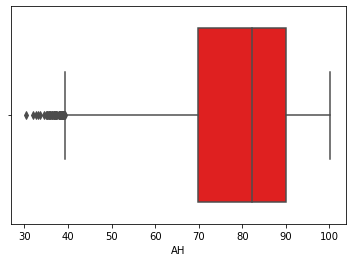

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AFDP


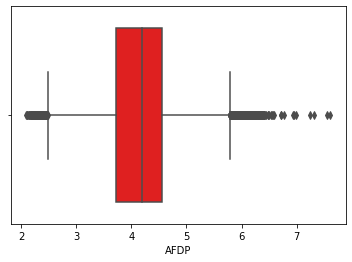

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


GTEP


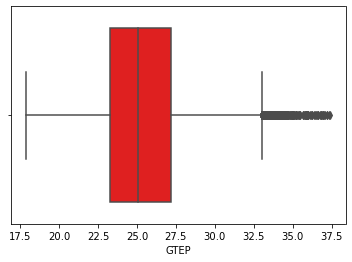

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TIT


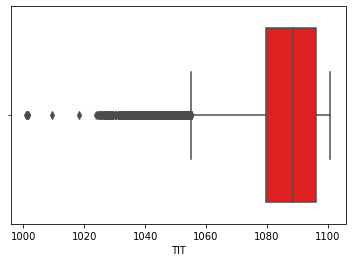

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TAT


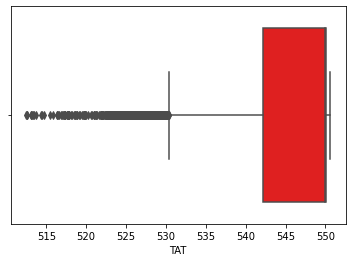

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TEY


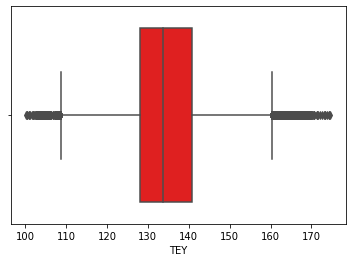

CDP


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


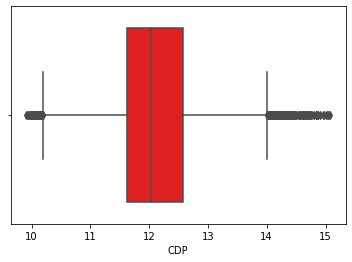

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


CO


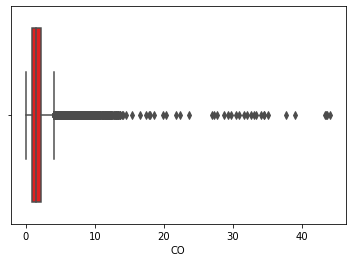

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NOX


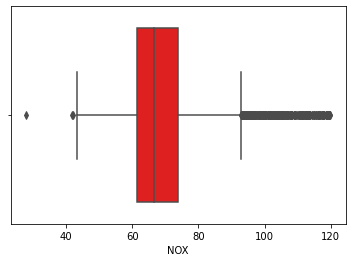

In [10]:
# Visulization by Boxplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

for i in gt.columns:
    print(i)
    sns.boxplot(gt[i],color = 'red')
    plt.show()

#### Inferences: About Skewness
AH,TIT,TAT are left Skewed(negative-skewness)

CO are Right Skewed (positive-skewness)

AT,AP,NOX are normally distributed

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc81ade9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc81af3820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc81aded00>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc81af3490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc81af3940>],
 'means': []}

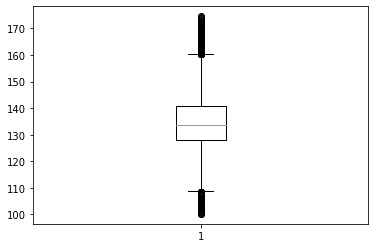

In [11]:
# Boxplot of Turbine Energy Yield (TEY)
plt.boxplot(gt['TEY'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEY'>

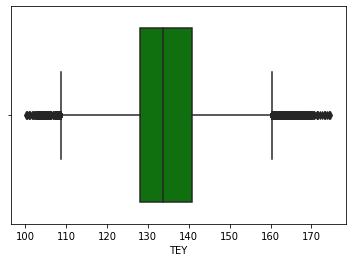

In [12]:
sns.boxplot(gt['TEY'], color = 'green')

In [13]:
#sns.set(rc={'figure.figsize': (20,20)})
#sns.boxplot(x="variable",y="value", data=pd.melt(gt))

### Independent and Dependent variable

In [14]:
X = gt.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= gt.loc[:,['TEY']]

### CROSS VALIDATION TECHNIQUE

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [16]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [18]:
# Current stable release for CPU and GPU
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 266.3/266.3 MB 833.4 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


     -------------------------------------- 57.5/57.5 kB 605.5 kB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 587.7 kB/s eta 0:00:00
     ------------------------------------ 124.6/124.6 kB 488.7 kB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 2.1 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 1.8 MB/s eta 0:00:00


In [19]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\Vaibhav Kinge\AppData\Local\Temp\ipykernel_10140\1991303876.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -0.17 (0.18) MSE


In [20]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-0.95329785, -0.9386201 , -0.9699379 , ..., -2.0839856 ,
       -1.967026  , -1.7218127 ], dtype=float32)

#### Train-Test Split Model Validation Technique

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [22]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [23]:
prediction

array([ 0.7912264 , -0.28909174,  1.1879523 , ..., -0.25258723,
       -0.50871044, -1.0951805 ], dtype=float32)

In [24]:
X = gt.drop(columns = ['TEY'], axis = 1) 
y = gt.iloc[:,7]

In [25]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [26]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [27]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [28]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 3s - loss: 2801.0068 - mean_squared_error: 2801.0068 - val_loss: 201.4244 - val_mean_squared_error: 201.4244 - 3s/epoch - 8ms/step
Epoch 2/100
381/381 - 1s - loss: 104.0606 - mean_squared_error: 104.0606 - val_loss: 80.4116 - val_mean_squared_error: 80.4116 - 728ms/epoch - 2ms/step
Epoch 3/100
381/381 - 1s - loss: 44.3929 - mean_squared_error: 44.3929 - val_loss: 36.1914 - val_mean_squared_error: 36.1914 - 811ms/epoch - 2ms/step
Epoch 4/100
381/381 - 1s - loss: 20.9138 - mean_squared_error: 20.9138 - val_loss: 15.5725 - val_mean_squared_error: 15.5725 - 723ms/epoch - 2ms/step
Epoch 5/100
381/381 - 1s - loss: 10.3262 - mean_squared_error: 10.3262 - val_loss: 7.7878 - val_mean_squared_error: 7.7878 - 731ms/epoch - 2ms/step
Epoch 6/100
381/381 - 1s - loss: 5.7829 - mean_squared_error: 5.7829 - val_loss: 4.4387 - val_mean_squared_error: 4.4387 - 734ms/epoch - 2ms/step
Epoch 7/100
381/381 - 1s - loss: 3.4677 - mean_squared_error: 3.4677 - val_loss: 2.7616 - val_mean_sq

In [29]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 1.2796 - mean_squared_error: 1.2796


In [30]:
predictions = model.predict_on_batch(X_test_scaled)

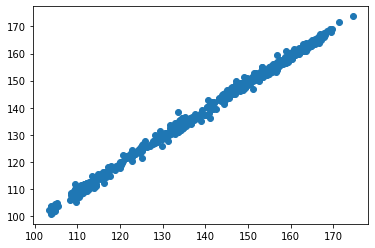

In [31]:
plt.scatter(y_test, predictions)

In [32]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,133.945679,0.382509
1,111.88,111.016701,0.771630
2,133.72,134.548386,0.619493
3,133.79,133.554733,0.175848
4,110.77,110.136589,0.571825
...,...,...,...
1499,132.85,132.048752,0.603122
1500,125.07,121.495850,2.857720
1501,160.95,160.718491,0.143839
1502,133.12,131.846741,0.956475


## Results:

### Here we got the information about skweness and normally distributed using Boxplot of given dataset.

### By using TensorFlow, Prediction of Turbine Energy Yield (TEY) we can see error is going to decrease it means we got better model.